In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Libraries

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.optimizers import Adamax
from sklearn.metrics import confusion_matrix




# Reading Data

In [ ]:
beforeWrangling = pd.read_csv("/content/drive/My Drive/GP/framingham.csv")

In [ ]:
heart_data = pd.read_csv('/content/drive/My Drive/GP/Heart disease prediction(second) /imputed_data.csv')

In [ ]:
heart_data.head()

,Unnamed: 0,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0
1,1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0





> Indented block



In [ ]:
heart_data.columns

Index(['Unnamed: 0', 'male', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
heart_data=heart_data[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']]

In [ ]:
len(heart_data.columns)

16

#Normalization and  Splitting Data

In [ ]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer(strategy='median')
imputed_data = pd.DataFrame(my_imputer.fit_transform(beforeWrangling))

# Imputation removed column names; put them back
imputed_data.columns = beforeWrangling.columns

NameError: ignored

In [ ]:
from sklearn.preprocessing import MinMaxScaler

target_column = ['TenYearCHD']
predictors = list(set(list(beforeWrangling.columns))-set(target_column))
bX = beforeWrangling[predictors].values
by = beforeWrangling[target_column].values
scalar = MinMaxScaler()
scalar.fit(bX)
bX = scalar.transform(bX)
bX_train, bX_test, by_train, by_test = train_test_split(bX, by, test_size=0.2, random_state=1)


NameError: ignored

After Cleaning

In [ ]:
from sklearn.preprocessing import MinMaxScaler

target_column = ['TenYearCHD']
predictors = list(set(list(heart_data.columns))-set(target_column))
X = heart_data[predictors].values
y = heart_data[target_column].values
scalar = MinMaxScaler()
scalar.fit(X)
X = scalar.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

# Keras Model

## Base model


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________
None


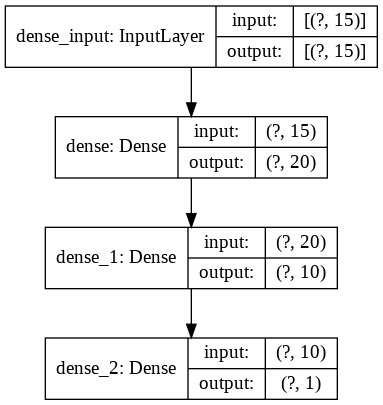

In [ ]:
from keras.utils.vis_utils import plot_model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(20, input_dim=15, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    # compile model
    adam = Adam(lr=0.0001)
    model.compile(loss="binary_crossentropy", optimizer=adam,metrics=['accuracy'])
    return model
model = create_model()
print(model.summary())
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history=model.fit(X_train, y_train, validation_split=0.2,epochs=300, shuffle = False)


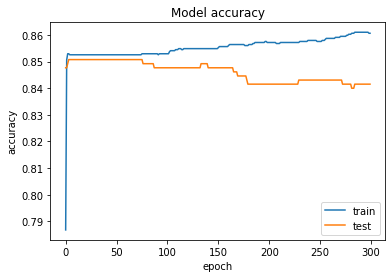

Train: 0.857, Test: 0.849


In [ ]:
#plotting
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

#Optimization

In [ ]:
# Use scikit-learn to grid search
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
	# create model
	model = Sequential()
	model.add(Dense(18, input_dim=15, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.855211 using {'optimizer': 'Adamax'}
0.853487 (0.008901) with: {'optimizer': 'SGD'}
0.854473 (0.010265) with: {'optimizer': 'RMSprop'}
0.851764 (0.007753) with: {'optimizer': 'Adagrad'}
0.851764 (0.007753) with: {'optimizer': 'Adadelta'}
0.854964 (0.009485) with: {'optimizer': 'Adam'}
0.855211 (0.009313) with: {'optimizer': 'Adamax'}
0.851270 (0.011023) with: {'optimizer': 'Nadam'}


# Learning Rate and Momentum

In [ ]:
# Use scikit-learn to grid search the learning rate and momentum
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
#from keras.optimizers import SGD
from keras.optimizers import Adamax

# Function to create model, required for KerasClassifier
def create_model(learn_rate=0.01, momentum=0):
	# create model
	model = Sequential()
	model.add(Dense(18, input_dim=15, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	#optimizer = SGD(lr=learn_rate, momentum=momentum)
	optimizer = Adamax(learning_rate=learn_rate, beta_1 = momentum)

	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.856195 using {'learn_rate': 0.001, 'momentum': 0.6}
0.854472 (0.008354) with: {'learn_rate': 0.001, 'momentum': 0.0}
0.855210 (0.007775) with: {'learn_rate': 0.001, 'momentum': 0.2}
0.853733 (0.007563) with: {'learn_rate': 0.001, 'momentum': 0.4}
0.856195 (0.007236) with: {'learn_rate': 0.001, 'momentum': 0.6}
0.855210 (0.008124) with: {'learn_rate': 0.001, 'momentum': 0.8}
0.855457 (0.010044) with: {'learn_rate': 0.001, 'momentum': 0.9}
0.850289 (0.013274) with: {'learn_rate': 0.01, 'momentum': 0.0}
0.854226 (0.008671) with: {'learn_rate': 0.01, 'momentum': 0.2}
0.852010 (0.011038) with: {'learn_rate': 0.01, 'momentum': 0.4}
0.849055 (0.012561) with: {'learn_rate': 0.01, 'momentum': 0.6}
0.852503 (0.010438) with: {'learn_rate': 0.01, 'momentum': 0.8}
0.847824 (0.009414) with: {'learn_rate': 0.01, 'momentum': 0.9}
0.848562 (0.008090) with: {'learn_rate': 0.1, 'momentum': 0.0}
0.849303 (0.011069) with: {'learn_rate': 0.1, 'momentum': 0.2}
0.852010 (0.007046) with: {'learn_rate':

# Network Weight Initialization

In [ ]:
# Use scikit-learn to grid search the weight initialization
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model(init_mode='uniform'):
	# create model
	model = Sequential()
	model.add(Dense(18, input_dim=15, kernel_initializer=init_mode, activation='relu'))
	model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 	#model.compile(loss='binary_crossentropy', optimizer='Adamax', metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.855457 using {'init_mode': 'uniform'}
0.855457 (0.009695) with: {'init_mode': 'uniform'}
0.853240 (0.008864) with: {'init_mode': 'lecun_uniform'}
0.854965 (0.010049) with: {'init_mode': 'normal'}
0.851764 (0.007753) with: {'init_mode': 'zero'}
0.854226 (0.010183) with: {'init_mode': 'glorot_normal'}
0.852503 (0.010805) with: {'init_mode': 'glorot_uniform'}
0.854718 (0.007536) with: {'init_mode': 'he_normal'}
0.851272 (0.011109) with: {'init_mode': 'he_uniform'}


# Number of Neurons in the Hidden Layer

In [ ]:
# Use scikit-learn to grid search the number of neurons
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
# Function to create model, required for KerasClassifier
def create_model(neurons=1):
	# create model
	model = Sequential()
	model.add(Dense(neurons, input_dim=15, kernel_initializer='lecun_uniform', activation='linear', kernel_constraint=maxnorm(4)))
	model.add(Dropout(0.2))
	model.add(Dense(1, kernel_initializer='lecun_uniform', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
neurons = [11,12,15,20]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Final Model

In [ ]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(11, input_dim=15,kernel_initializer='lecun_uniform', activation='relu'))
    model.add(Dense(11,kernel_initializer='lecun_uniform', activation='relu'))
    model.add(Dense(1,kernel_initializer='lecun_uniform', activation='sigmoid'))
    # compile model
    #sgd = SGD(lr=0.001, momentum = 0)
    optimizer = Adamax(learning_rate=0.001, beta_1 = 0)

    model.compile(loss="binary_crossentropy", optimizer=optimizer,metrics=['accuracy'])
    return model
model = create_model()
print(model.summary())
history=model.fit(X_train, y_train, validation_split=0.25,epochs=50, shuffle = False)


Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 11)                176       
_________________________________________________________________
dense_45 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 12        
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
77/77 [==============================] - 0s 3ms/step - loss: 0.6742 - accuracy: 0.6289 - val_loss: 0.6195 - val_accuracy: 0.8473
Epoch 2/50
77/77 [==============================] - 0s 1ms/step - loss: 0.5783 - accuracy: 0.8539 - val_loss: 0.5435 - val_accuracy: 0.8473
Epoch 3/50
77/77 [==============================] - 0s 1ms/step - loss: 0.5092 - accuracy: 0.8539 - 

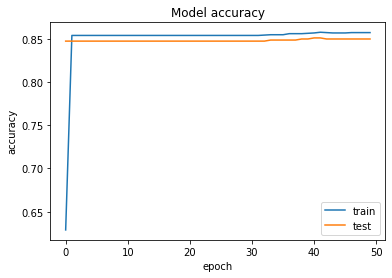

Train: 0.855, Test: 0.852


In [ ]:
#plotting
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))